# Оптимизация производственных расходов металлургического комбината «Стальная птица»

# ЦЕЛЬ ПРОЕКТА

Построить модель, которая будет предсказывать температуру сплава.

**Описание проекта: промышленность**

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. 

Ваша задача — построить модель, которая будет её предсказывать. 

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:
1. data_arc_new.csv — данные об электродах;
2. data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
3. data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
4. data_gas_new.csv — данные о продувке сплава газом;
5. data_temp_new.csv — результаты измерения температуры;
6. data_wire_new.csv — данные о проволочных материалах (объём);
7. data_wire_time_new.csv — данные о проволочных материалах (время).


1. Файл data_arc_new.csv
- key — номер партии;
- Начало нагрева дугой — время начала нагрева;
- Конец нагрева дугой — время окончания нагрева;
- Активная мощность — значение активной мощности;
- Реактивная мощность — значение реактивной мощности.

2. Файл data_bulk_new.csv
- key — номер партии;
- Bulk 1 … Bulk 15 — объём подаваемого материала.

3. Файл data_bulk_time_new.csv
- key — номер партии;
- Bulk 1 … Bulk 15 — время подачи материала.

4. Файл data_gas_new.csv
- key — номер партии;
- Газ 1 — объём подаваемого газа.

5. Файл data_temp_new.csv
- key — номер партии;
- Время замера — время замера;
- Температура — значение температуры.

6. Файл data_wire_new.csv
- key — номер партии;
- Wire 1 … Wire 9 — объём подаваемых проволочных материалов.

7. Файл data_wire_time_new.csv
- key — номер партии;
- Wire 1 … Wire 9 — время подачи проволочных материалов.

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

**План работы**

- Шаг 1. [Загрузка данных](#view)
- Шаг 2. [Исследовательский анализ и предобработка данных](#analiz1)
- Шаг 3. [Объединение данных](#combining)
- Шаг 4. [ Исследовательский анализ и предобработка данных объединённого датафрейма](#analiz)
- Шаг 5. [Подготовка данных](#preprocessing)
- Шаг 6. [Обучение моделей машинного обучения](#learning)
- Шаг 7. [Выбор лучшей модели](#choosing)
- Шаг 8. [ОБЩИЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ](#resumefinal)


##  Загрузка данных <a name="view"></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

### Загрузим data_arc_new.csv

In [2]:
pth1 = '/datasets/data_arc_new.csv'
pth2 = 'https://code.s3.yandex.net/datasets/data_arc_new.csv'

if os.path.exists(pth1):
    data_arc_new = pd.read_csv(pth1, parse_dates = ['Начало нагрева дугой', 'Конец нагрева дугой'])
elif os.path.exists(pth2):
    data_arc_new = pd.read_csv(pth2, parse_dates = ['Начало нагрева дугой', 'Конец нагрева дугой'])
else:
    print('Что-то пошло не так...')

In [3]:
def descr (df):
    display(df.head(5))
    print('---------------------------------------------------------------------------------------------------------')
    display(df.info()) 
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Количество пропусков:  {df.isna().sum()}')
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Описание: ')
    display(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Размер: {df.shape}')

In [4]:
descr(data_arc_new)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


---------------------------------------------------------------------------------------------------------
Размер: (14876, 5)


Мы видим что значение key повторяется с разными значениями по дате нагрева, судя по всему это количество повторений для очистки сплава для одной партии 

### Загрузим data_bulk_new.csv

In [5]:
pth11 = '/datasets/data_bulk_new.csv'
pth21 = 'https://code.s3.yandex.net/datasets/data_bulk_new.csv'

if os.path.exists(pth1):
    data_bulk_new = pd.read_csv(pth11)
elif os.path.exists(pth2):
    data_bulk_new = pd.read_csv(pth21)
else:
    print('Что-то пошло не так...')

In [6]:
descr(data_bulk_new)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


---------------------------------------------------------------------------------------------------------
Размер: (3129, 16)


Видим большое количество пропусков в объёмах подаваемого материала, судя по всему, для каждой партии необходимо разное количество повторов нагрева и разный объем. Например в Bulk 8 - 3128 пропусков и только одно значение.

### Загрузим data_bulk_time_new.csv

In [7]:
pth12 = '/datasets/data_bulk_time_new.csv'
pth22 = 'https://code.s3.yandex.net/datasets/data_bulk_time_new.csv'

if os.path.exists(pth1):
    data_bulk_time_new = pd.read_csv(pth12, parse_dates = ['Bulk 1','Bulk 2','Bulk 3','Bulk 4','Bulk 5',
                                                      'Bulk 6','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11',
                                                      'Bulk 12','Bulk 13','Bulk 14','Bulk 15'])
elif os.path.exists(pth2):
    data_bulk_time_new = pd.read_csv(pth22, parse_dates = ['Bulk 1','Bulk 2','Bulk 3','Bulk 4','Bulk 5',
                                                      'Bulk 6','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11',
                                                      'Bulk 12','Bulk 13','Bulk 14','Bulk 15'])
else:
    print('Что-то пошло не так...')

In [8]:
descr(data_bulk_time_new)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


---------------------------------------------------------------------------------------------------------
Размер: (3129, 16)


Количество пропусков в данных о подаче сыпучих материалов (объём) и данных о подаче сыпучих материалов (время) одинаково, что логично.

### Загрузим data_gas_new.csv

In [9]:
pth13 = '/datasets/data_gas_new.csv'
pth23 = 'https://code.s3.yandex.net/datasets/data_gas_new.csv'

if os.path.exists(pth1):
    data_gas_new = pd.read_csv(pth13)
elif os.path.exists(pth2):
    data_gas_new = pd.read_csv(pth23)
else:
    print('Что-то пошло не так...')

In [10]:
descr(data_gas_new)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key      0
Газ 1    0
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


---------------------------------------------------------------------------------------------------------
Размер: (3239, 2)


### Загрузим data_temp_new.csv

In [11]:
pth14 = '/datasets/data_temp_new.csv'
pth24 = 'https://code.s3.yandex.net/datasets/data_temp_new.csv'

if os.path.exists(pth1):
    data_temp_new = pd.read_csv(pth14, parse_dates = ['Время замера'])
elif os.path.exists(pth2):
    data_temp_new = pd.read_csv(pth24, parse_dates = ['Время замера'])
else:
    print('Что-то пошло не так...')

In [12]:
descr(data_temp_new)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key                0
Время замера       0
Температура     3427
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


---------------------------------------------------------------------------------------------------------
Размер: (18092, 3)


Размер датасета data_temp_new.csv составляет 18092 строк, это связано скорее всего с количеством замеров по каждому объёму подаваемого материала для каждой партии

### Загрузим data_wire_new.csv

In [13]:
pth15 = '/datasets/data_wire_new.csv'
pth25 = 'https://code.s3.yandex.net/datasets/data_wire_new.csv'

if os.path.exists(pth1):
    data_wire_new = pd.read_csv(pth15)
elif os.path.exists(pth2):
    data_wire_new = pd.read_csv(pth25)
else:
    print('Что-то пошло не так...')

In [14]:
descr(data_wire_new)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


---------------------------------------------------------------------------------------------------------
Размер: (3081, 10)


Размер: (3081, 10), что меньше ранее изученных датафреймов, это может свидетельствовать о том, что не при каждом нагреве использовали проволоку.

### Загрузим data_wire_time_new.csv

In [15]:
pth16 = '/datasets/data_wire_time_new.csv'
pth26 = 'https://code.s3.yandex.net/datasets/data_wire_time_new.csv'

if os.path.exists(pth1):
    data_wire_time_new = pd.read_csv(pth16, parse_dates = ['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'])
elif os.path.exists(pth2):
    data_wire_time_new = pd.read_csv(pth26, parse_dates = ['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'])
else:
    print('Что-то пошло не так...')

In [16]:
descr(data_wire_time_new)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


---------------------------------------------------------------------------------------------------------
Размер: (3081, 10)


**Вывод**

После згрузки данных сделали следующие выводы:

- В датасетах столбцы на разных языках и много пропусков, принято решение пока пропуски оставим как есть.
- Во всех столбцах фреймов столбцы с датами перевели в формат datetime. 


Пропуски в столбцах могут быть по разным причинам: ошибка переноса, ошибка датчика или же просто остутсвие необходимости в проведении действия (нагрев, добавка присадок и пр.)



##  Исследовательский анализ и предобработка данных <a name="analiz1"></a>

In [17]:
def hist_box(df,col):
    fig, axs = plt.subplots(ncols=2,figsize=(16,8))
    sns.set(font_scale=1.10)
    histplot = sns.histplot(df[col],ax=axs[0], color='green', bins=50).set_title(f'Распределение {col}',fontsize=20);
    sns.boxplot(df[col], ax=axs[1]).set_title(f'Ящик с усами {col}',fontsize=20); 
    
    print(df[col].describe()) 

### Анализ data_arc_new

В data_arc_new изменим название столбцов и приведём к однообразию

In [18]:
data_arc_new.columns = ['key', 'start_heating','end_heating', 'active_power', 'reactive_power']
data_arc_new.columns

Index(['key', 'start_heating', 'end_heating', 'active_power',
       'reactive_power'],
      dtype='object')

count    14876.000000
mean         0.662752
std          0.258885
min          0.223120
25%          0.467115
50%          0.599587
75%          0.830070
max          1.463773
Name: active_power, dtype: float64


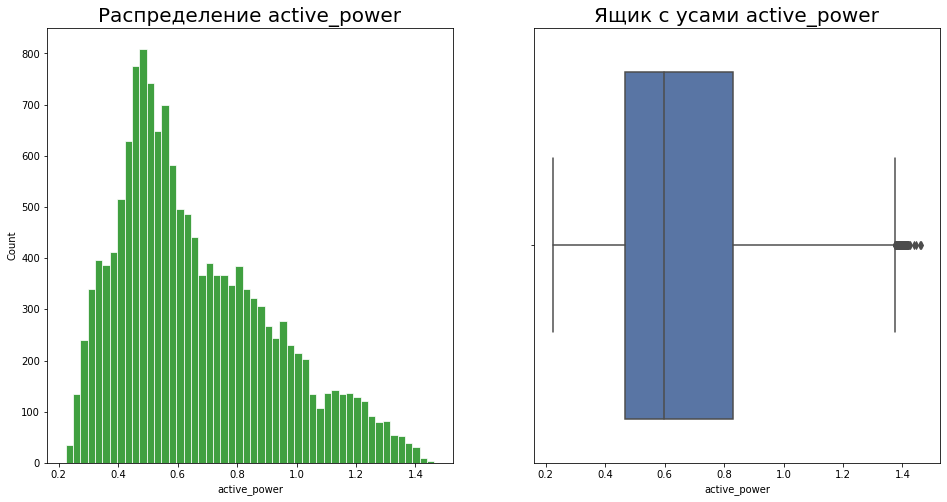

In [19]:
hist_box(data_arc_new,'active_power')

count    14876.000000
mean         0.438986
std          5.873485
min       -715.479924
25%          0.337175
50%          0.441639
75%          0.608201
max          1.270284
Name: reactive_power, dtype: float64


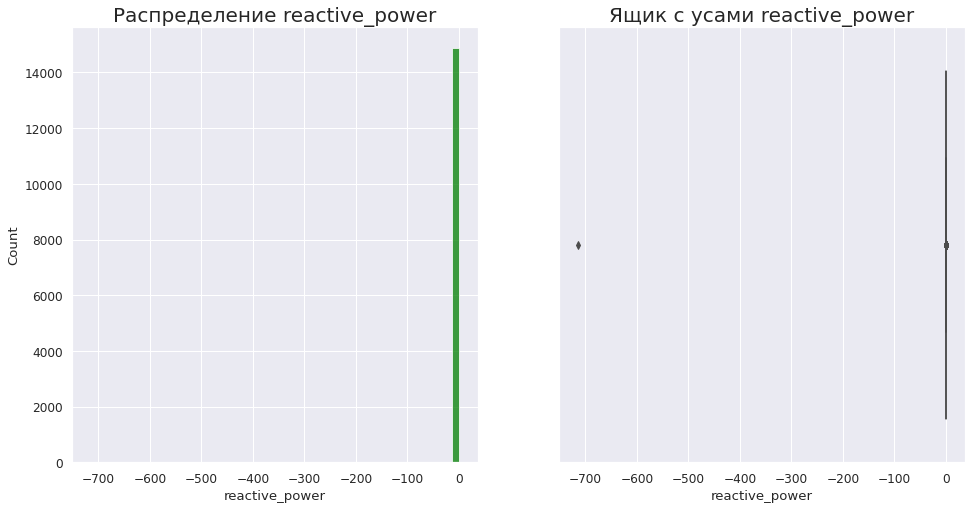

In [20]:
hist_box(data_arc_new,'reactive_power')

In [21]:
data_arc_new = data_arc_new.query('reactive_power > 0')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что обработано наблюдение с отрицательной реактивной мощностью

count    14875.000000
mean         0.487115
std          0.197612
min          0.153777
25%          0.337190
50%          0.441665
75%          0.608223
max          1.270284
Name: reactive_power, dtype: float64


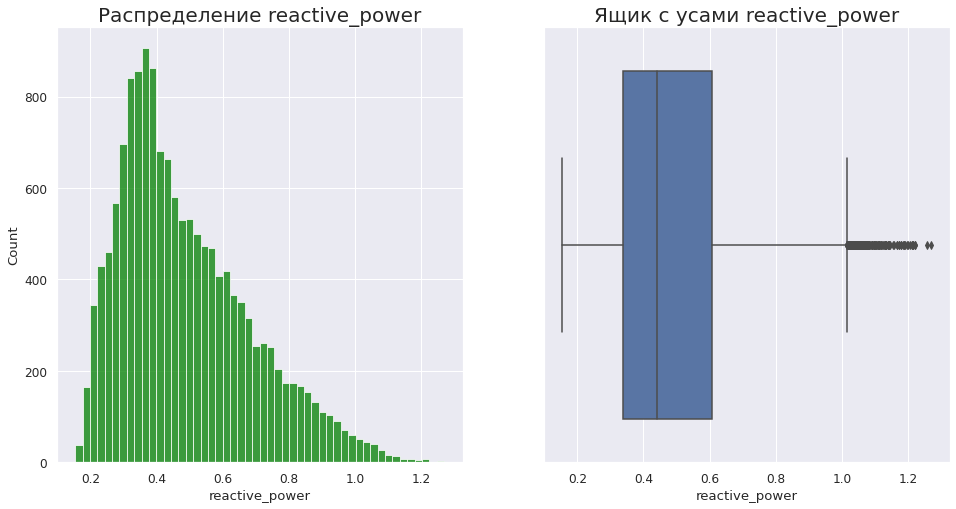

In [22]:
hist_box(data_arc_new,'reactive_power')

Вычислим полную мощность:

In [23]:
data_arc_new['real_power'] = (data_arc_new['active_power']**2 + data_arc_new['reactive_power']**2)**0.5

Также стоит просчитать общее время нагрева:

In [24]:
data_arc_new['heating_time'] = data_arc_new['end_heating'] - data_arc_new['start_heating']
data_arc_new['heating_time'] = data_arc_new['heating_time'].dt.seconds

Имея полную мощность и общее время нагрева вычислим затраты электроэнергии:

In [25]:
data_arc_new['electricity_costs'] = data_arc_new['real_power']*data_arc_new['heating_time']

In [26]:
data_arc_new = data_arc_new.groupby(by = 'key').sum()
data_arc_new.head()

,active_power,reactive_power,real_power,heating_time,electricity_costs
key,,,,,
1,3.036730,2.142821,3.718736,1098,770.282114
2,2.139408,1.453357,2.588349,811,481.760005
3,4.063641,2.937457,5.019223,655,722.837668
4,2.706489,2.056992,3.400038,741,683.455597
5,2.252950,1.687991,2.816980,869,512.169934


count    3214.000000
mean        3.810779
std         1.502804
min         0.331897
25%         2.775306
50%         3.694219
75%         4.696915
max        15.288271
Name: real_power, dtype: float64


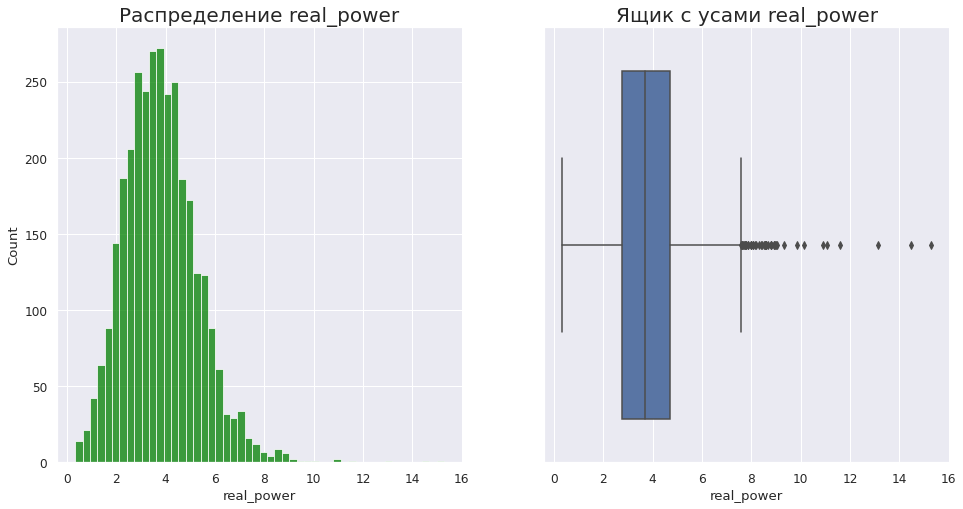

In [27]:
hist_box(data_arc_new,'real_power')

count    3214.000000
mean      794.545115
std       332.491076
min        57.000000
25%       571.000000
50%       770.000000
75%       983.000000
max      4189.000000
Name: heating_time, dtype: float64


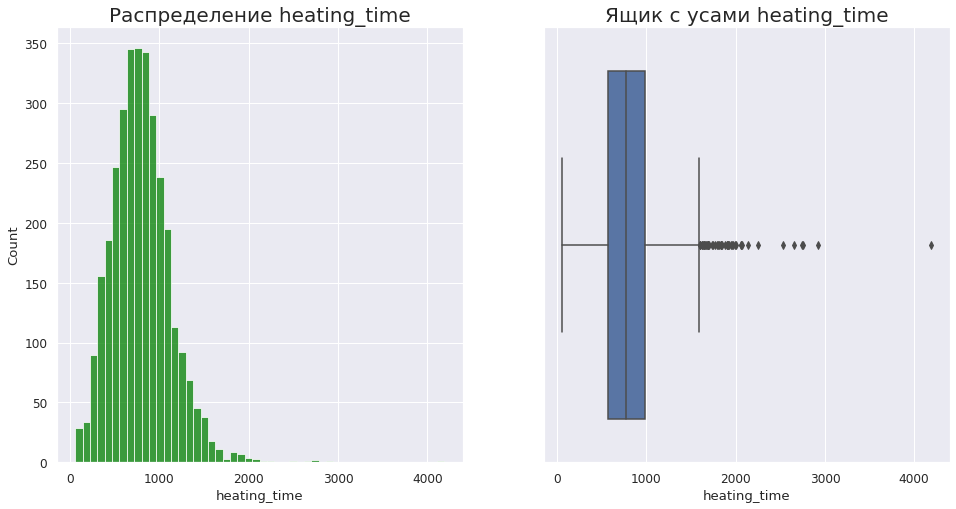

In [28]:
hist_box(data_arc_new,'heating_time')

count    3214.000000
mean      655.569107
std       308.976732
min        33.430208
25%       444.626580
50%       620.101427
75%       827.671845
max      4546.405812
Name: electricity_costs, dtype: float64


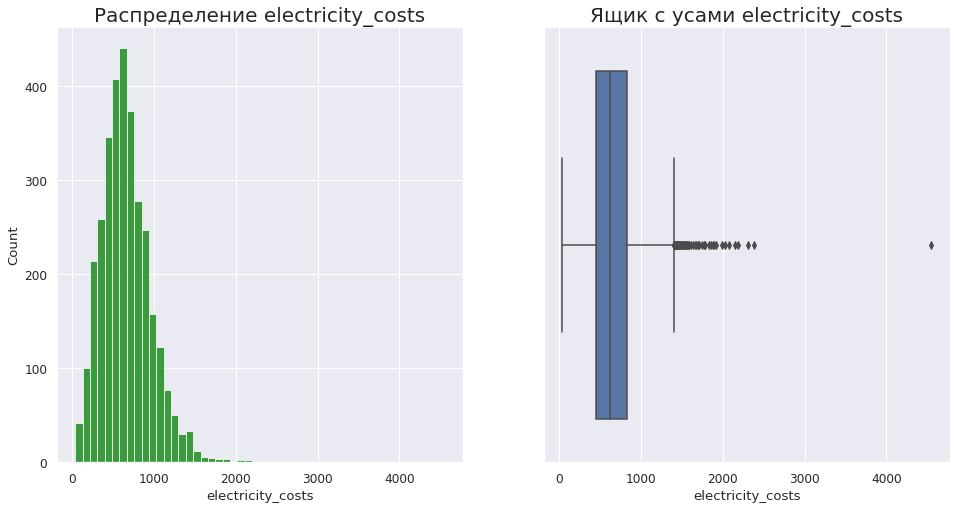

In [29]:
hist_box(data_arc_new,'electricity_costs')

In [30]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   active_power       3214 non-null   float64
 1   reactive_power     3214 non-null   float64
 2   real_power         3214 non-null   float64
 3   heating_time       3214 non-null   int64  
 4   electricity_costs  3214 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.7 KB


После создания новых признаков и группировки мы видим что у новых признаков расспредеоление колоколообразное с определенным количеством выбросов. Пока что их оставим

### Анализ data_bulk_new 

В data_bulk_new изменим название столбцов и приведём к однообразию

In [31]:
data_bulk_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [32]:
data_bulk_new.columns = ['key',    'bulk_1', 'bulk_2',  'bulk_3',  'bulk_4',  'bulk_5',  'bulk_6',  'bulk_7',
                     'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15']
data_bulk_new.columns

Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')

In [33]:
pd.DataFrame(round(data_bulk_new.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
key,0.000000
bulk_1,91.900000
bulk_2,99.300000
bulk_3,58.500000
bulk_4,67.600000
bulk_5,97.500000
bulk_6,81.600000
bulk_7,99.200000
bulk_8,100.000000
bulk_9,99.400000


Мы видим что есть много столбцов где пропусков свыше 80%, удалим их

In [34]:
data_bulk_new.drop(['bulk_1','bulk_2', 'bulk_5', 'bulk_6', 'bulk_7','bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_13'], axis= 1 , inplace= True )

Заменим пропуски на нули

In [35]:
data_bulk_new = data_bulk_new.fillna(0)
data_bulk_new.isna().sum()

key        0
bulk_3     0
bulk_4     0
bulk_12    0
bulk_14    0
bulk_15    0
dtype: int64

In [36]:
data_bulk_new = data_bulk_new.astype('int')
data_bulk_new.head()

,key,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15
0,1,0,43,206,150,154
1,2,0,73,206,149,154
2,3,0,34,205,152,153
3,4,0,81,207,153,154
4,5,0,78,203,151,152


### Анализ data_gas_new

In [37]:
data_gas_new.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [38]:
data_gas_new.columns = ['key', 'gas']
data_gas_new.columns

Index(['key', 'gas'], dtype='object')

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: gas, dtype: float64


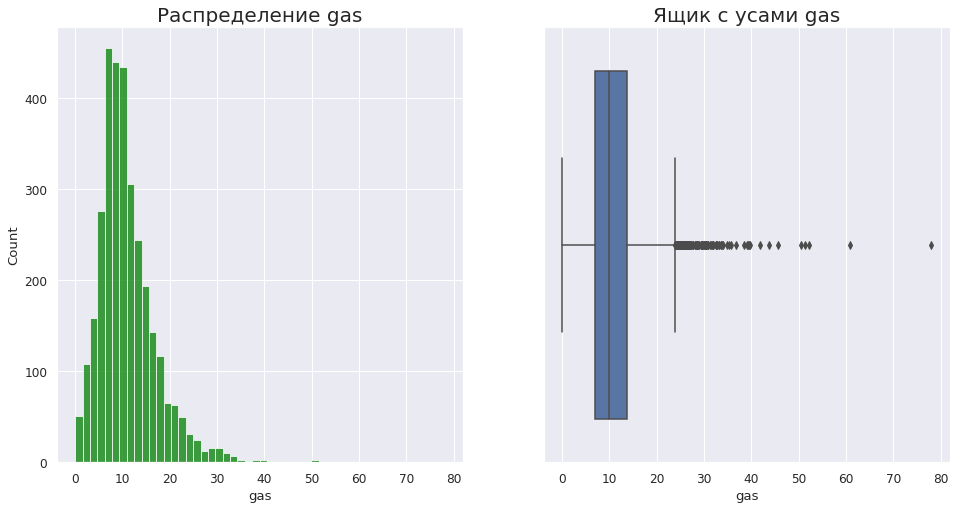

In [39]:
hist_box(data_gas_new,'gas')

### Анализ data_temp_new

In [40]:
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [41]:
data_temp_new.columns = ['key', 'time', 'temperature']
data_temp_new.columns

Index(['key', 'time', 'temperature'], dtype='object')

count    14665.000000
mean      1590.722741
std         20.394381
min       1191.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temperature, dtype: float64


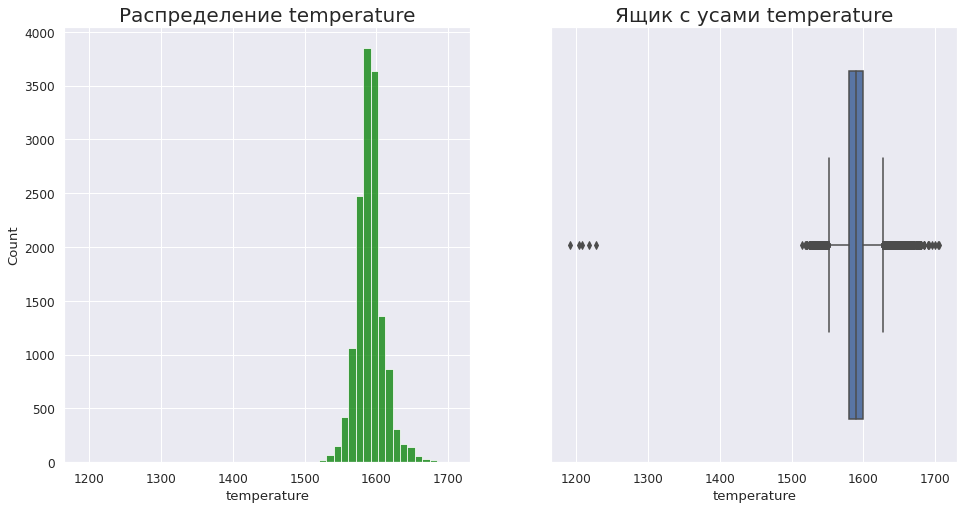

In [42]:
hist_box(data_temp_new, 'temperature')

Расспределение температуры нормальное , но мы видим аномальные значения ниже 1500 градусов, удалим их.

In [43]:
data_temp_new = data_temp_new.query('temperature > 1500')

count    14660.000000
mean      1590.852729
std         19.143141
min       1515.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temperature, dtype: float64


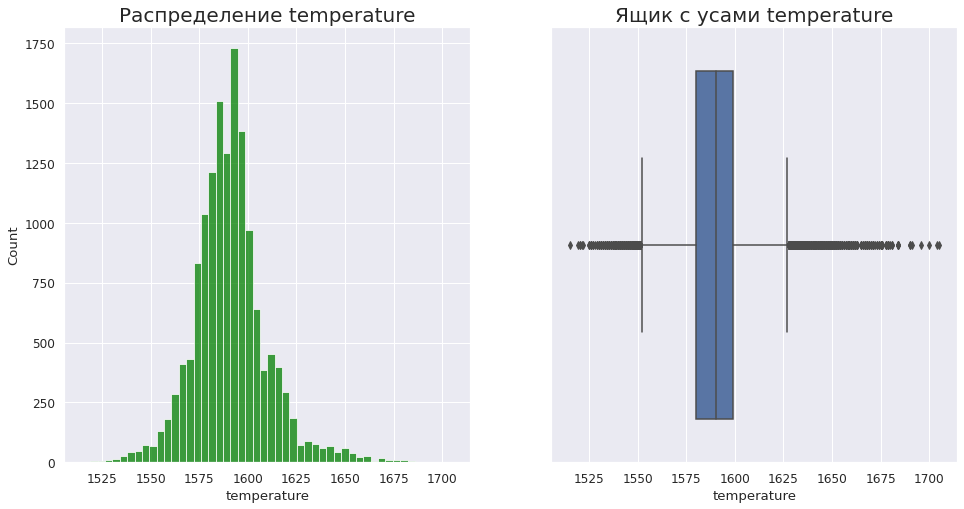

In [44]:
hist_box(data_temp_new, 'temperature')

In [45]:
pd.DataFrame(round(data_temp_new.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
key,0.000000
time,0.000000
temperature,0.000000


In [46]:
data_temp_new.head()

,key,time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [47]:
measurements_rounds = data_temp_new['key'].value_counts().reset_index(name='measurements_rounds').rename(columns={'index': 'key'}).sort_values(by='key', ascending=False)

In [48]:
measurements_rounds.query('measurements_rounds > 1').head()

,key,measurements_rounds
1712,2499,5
968,2498,6
2298,2497,4
602,2496,7
1420,2495,5


С партии 2500 количество измерений равно единице

Добавим признак: разницу между последним и первым замером температуры.

In [49]:
data_temp_final = data_temp_new.groupby(by = 'key').agg(['first', 'last']).reset_index()
data_temp_final.columns = ['key', 'first_time', 'finish_time', 'first_temp', 'finish_temp']
data_temp_final['time_diff'] = data_temp_final['finish_time'] - data_temp_final['first_time']
data_temp_final['time_diff'] = data_temp_final['time_diff'].dt.seconds
data_temp_final = data_temp_final.query('key < 2500')
data_temp_final.tail()

,key,first_time,finish_time,first_temp,finish_temp,time_diff
2472,2495,2019-08-10 11:27:47,2019-08-10 11:50:47,1570.0,1591.0,1380
2473,2496,2019-08-10 11:56:48,2019-08-10 12:25:13,1554.0,1591.0,1705
2474,2497,2019-08-10 12:37:26,2019-08-10 12:53:28,1571.0,1589.0,962
2475,2498,2019-08-10 12:58:11,2019-08-10 13:23:31,1591.0,1594.0,1520
2476,2499,2019-08-10 13:33:21,2019-08-10 13:58:58,1569.0,1603.0,1537


### Анализ data_wire_new

In [50]:
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data_wire_new.columns = ['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9']
data_wire_new.columns

Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9'],
      dtype='object')

In [52]:
pd.DataFrame(round(data_wire_new.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
key,0.000000
wire_1,0.800000
wire_2,65.000000
wire_3,98.000000
wire_4,99.500000
wire_5,100.000000
wire_6,97.600000
wire_7,99.600000
wire_8,99.400000
wire_9,99.100000


Мы видим что есть много столбцов где пропусков свыше 80%, удалим их

In [53]:
data_wire_new.drop(['wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9'], axis= 1 , inplace= True )
data_wire_new = data_wire_new.fillna(0)
data_wire_new.head()

,key,wire_1,wire_2
0,1,60.059998,0.00000
1,2,96.052315,0.00000
2,3,91.160157,0.00000
3,4,89.063515,0.00000
4,5,89.238236,9.11456


**Вывод**

- Привели названия столбцов к стандартному виду.
- Обработали пропуски и выбросы: удалили столбцы где значения превышают 80%. Также убрали аномалии по температуре ниже 1500 и отрицательную мощность
- Добавили дополнительные признаки там, где это показалось уместным.
- Подготовили данные для объединения в общий датасет. Также удалили данные с одним измерением температуры.

##  Объединение данных <a name="combining"></a>

Для объединения таблиц используем все, кроме data_bulk_time_new и data_wire_time_new.

In [54]:
data =  data_arc_new.merge(data_temp_final, on='key', how='inner')
data = data.merge(data_gas_new, on='key', how='inner')
data = data.merge(data_bulk_new, on='key', how='inner')
data = data.merge(data_wire_new, on='key', how='inner')

In [55]:
descr(data)

,key,active_power,reactive_power,real_power,heating_time,electricity_costs,first_time,finish_time,first_temp,finish_temp,time_diff,gas,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,wire_1,wire_2
0,1,3.036730,2.142821,3.718736,1098,770.282114,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0,1714,29.749986,0,43,206,150,154,60.059998,0.00000
1,2,2.139408,1.453357,2.588349,811,481.760005,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0,1265,12.555561,0,73,206,149,154,96.052315,0.00000
2,3,4.063641,2.937457,5.019223,655,722.837668,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0,1753,28.554793,0,34,205,152,153,91.160157,0.00000
3,4,2.706489,2.056992,3.400038,741,683.455597,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0,1220,18.841219,0,81,207,153,154,89.063515,0.00000
4,5,2.252950,1.687991,2.816980,869,512.169934,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0,1536,5.413692,0,78,203,151,152,89.238236,9.11456


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                2329 non-null   int64         
 1   active_power       2329 non-null   float64       
 2   reactive_power     2329 non-null   float64       
 3   real_power         2329 non-null   float64       
 4   heating_time       2329 non-null   int64         
 5   electricity_costs  2329 non-null   float64       
 6   first_time         2329 non-null   datetime64[ns]
 7   finish_time        2329 non-null   datetime64[ns]
 8   first_temp         2329 non-null   float64       
 9   finish_temp        2329 non-null   float64       
 10  time_diff          2329 non-null   int64         
 11  gas                2329 non-null   float64       
 12  bulk_3      

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  key                  0
active_power         0
reactive_power       0
real_power           0
heating_time         0
electricity_costs    0
first_time           0
finish_time          0
first_temp           0
finish_temp          0
time_diff            0
gas                  0
bulk_3               0
bulk_4               0
bulk_12              0
bulk_14              0
bulk_15              0
wire_1               0
wire_2               0
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,key,active_power,reactive_power,real_power,heating_time,electricity_costs,first_temp,finish_temp,time_diff,gas,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,wire_1,wire_2
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000
mean,1251.832546,3.125033,2.300522,3.884654,807.600687,669.741514,1587.386003,1593.365393,2321.810219,11.375600,47.348218,37.303564,208.415629,153.853585,119.952769,102.443601,17.609859
std,714.762400,1.221007,0.903968,1.518157,340.897332,319.531949,23.619841,11.200915,1385.191527,6.392041,75.310430,58.643238,157.062272,81.404354,84.640443,43.539993,33.624771
min,1.000000,0.267676,0.196228,0.331897,57.000000,33.430208,1519.000000,1541.000000,270.000000,0.008399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,630.000000,2.293900,1.669572,2.843058,581.000000,457.864703,1571.000000,1587.000000,1579.000000,7.282948,0.000000,0.000000,105.000000,105.000000,0.000000,73.207679,0.000000
50%,1255.000000,3.035365,2.225398,3.767499,778.000000,630.714148,1587.000000,1593.000000,2045.000000,10.100950,0.000000,0.000000,206.000000,149.000000,107.000000,101.119201,0.000000
75%,1868.000000,3.834300,2.829159,4.769421,993.000000,841.398018,1603.000000,1598.000000,2791.000000,14.216688,80.000000,77.000000,282.000000,204.000000,204.000000,128.091599,23.102560
max,2499.000000,12.375636,8.949049,15.288271,4189.000000,4546.405812,1660.000000,1653.000000,23674.000000,77.995040,454.000000,281.000000,1849.000000,636.000000,405.000000,330.314424,282.780152


---------------------------------------------------------------------------------------------------------
Размер: (2329, 19)


Удалим признак key а также first_time и	finish_time

In [56]:
data.drop(['key', 'first_time', 'finish_time'], axis= 1 , inplace= True )

In [57]:
data.tail()

,active_power,reactive_power,real_power,heating_time,electricity_costs,first_temp,finish_temp,time_diff,gas,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,wire_1,wire_2
2324,3.168133,2.210936,3.868721,723,694.177326,1570.0,1591.0,1380,7.125735,21,0,256,129,223,89.150879,0.00000
2325,4.174918,2.872031,5.070316,940,815.818538,1554.0,1591.0,1705,9.412616,0,63,256,129,226,114.179527,0.00000
2326,3.605239,2.452092,4.360918,569,823.020520,1571.0,1589.0,962,6.271699,0,85,230,124,226,94.086723,9.04800
2327,3.202310,2.239820,3.909917,750,581.810739,1591.0,1594.0,1520,14.953657,90,0,206,129,207,118.110717,0.00000
2328,1.737084,1.296836,2.169252,883,532.386183,1569.0,1603.0,1537,11.336151,47,0,233,126,227,110.160958,50.00528


**Выводы**

Мы объединили все необходимые датасеты в один итоговый. В нем пропуски и дубликаты отсутствуют, также удалили признак key. Итоговый размер датасета (2329, 19).

##  Исследовательский анализ и предобработка данных объединённого датафрейма <a name="analiz"></a>

In [58]:
num_col = ['active_power', 'reactive_power', 'real_power', 'heating_time',
       'electricity_costs', 'first_temp', 'finish_temp', 'time_diff', 'gas',
       'bulk_3', 'bulk_4', 'bulk_12', 'bulk_14', 'bulk_15', 'wire_1',
       'wire_2']

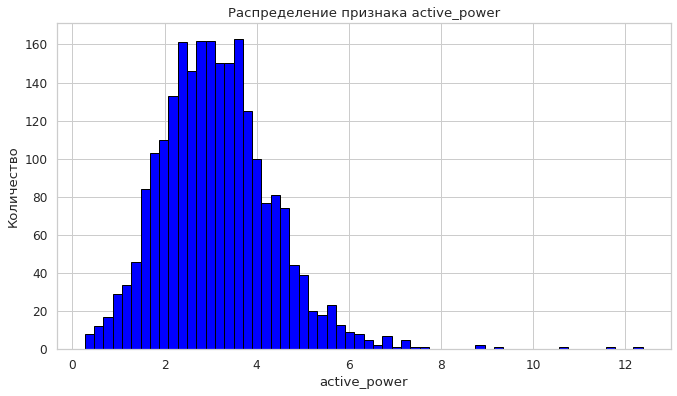

count    2329.000000
mean        3.125033
std         1.221007
min         0.267676
25%         2.293900
50%         3.035365
75%         3.834300
max        12.375636
Name: active_power, dtype: float64


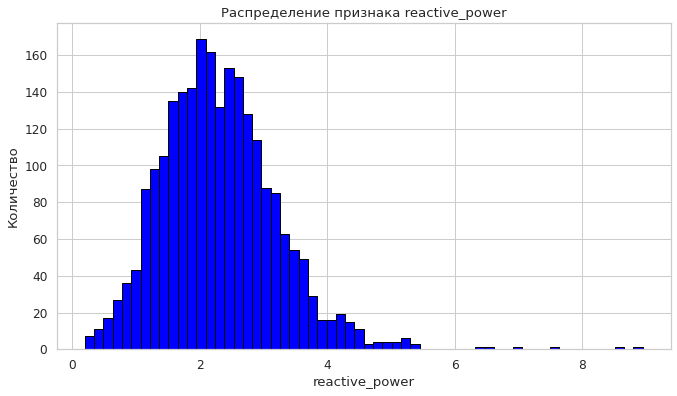

count    2329.000000
mean        2.300522
std         0.903968
min         0.196228
25%         1.669572
50%         2.225398
75%         2.829159
max         8.949049
Name: reactive_power, dtype: float64


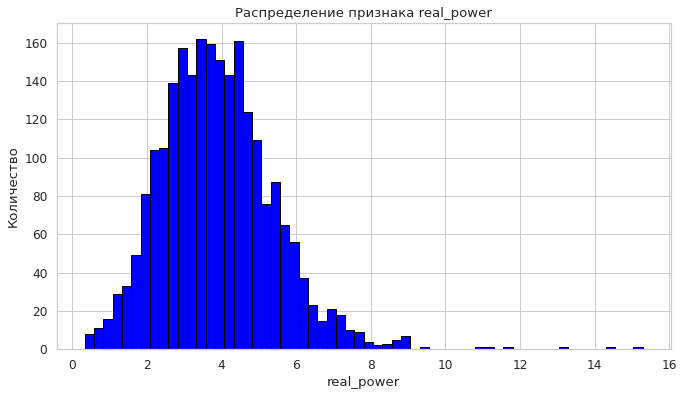

count    2329.000000
mean        3.884654
std         1.518157
min         0.331897
25%         2.843058
50%         3.767499
75%         4.769421
max        15.288271
Name: real_power, dtype: float64


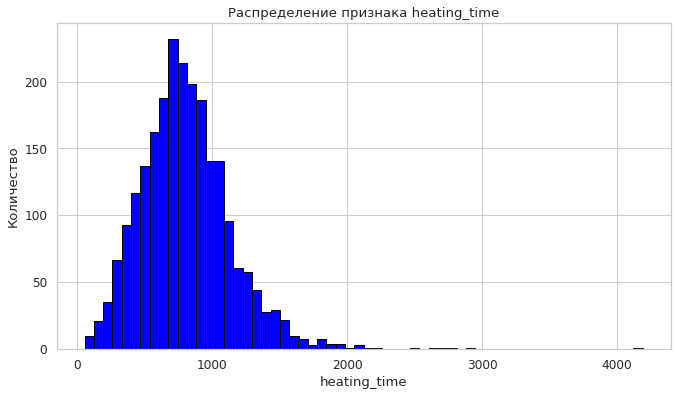

count    2329.000000
mean      807.600687
std       340.897332
min        57.000000
25%       581.000000
50%       778.000000
75%       993.000000
max      4189.000000
Name: heating_time, dtype: float64


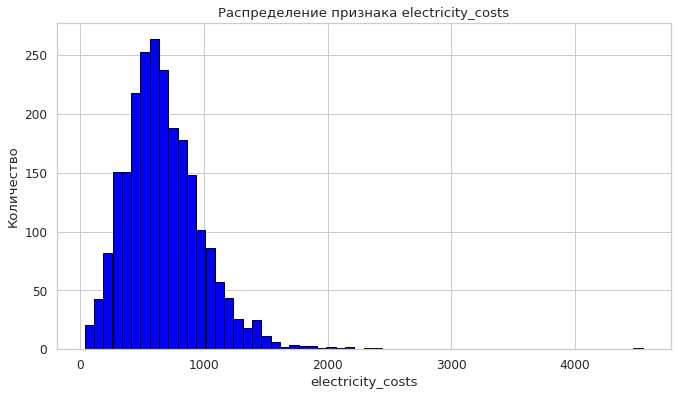

count    2329.000000
mean      669.741514
std       319.531949
min        33.430208
25%       457.864703
50%       630.714148
75%       841.398018
max      4546.405812
Name: electricity_costs, dtype: float64


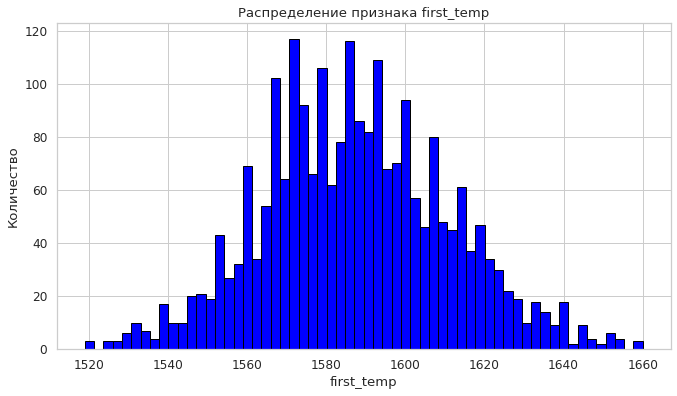

count    2329.000000
mean     1587.386003
std        23.619841
min      1519.000000
25%      1571.000000
50%      1587.000000
75%      1603.000000
max      1660.000000
Name: first_temp, dtype: float64


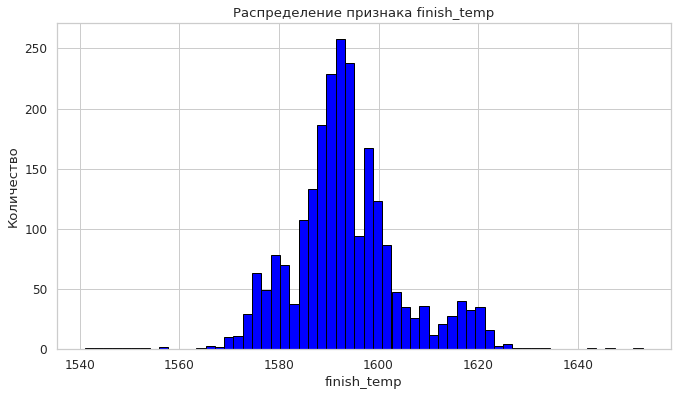

count    2329.000000
mean     1593.365393
std        11.200915
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1598.000000
max      1653.000000
Name: finish_temp, dtype: float64


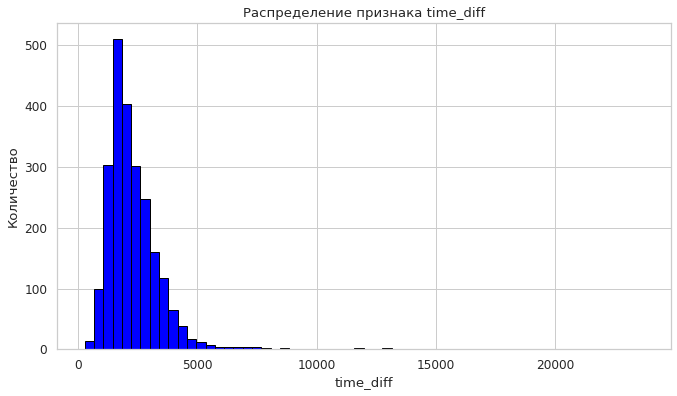

count     2329.000000
mean      2321.810219
std       1385.191527
min        270.000000
25%       1579.000000
50%       2045.000000
75%       2791.000000
max      23674.000000
Name: time_diff, dtype: float64


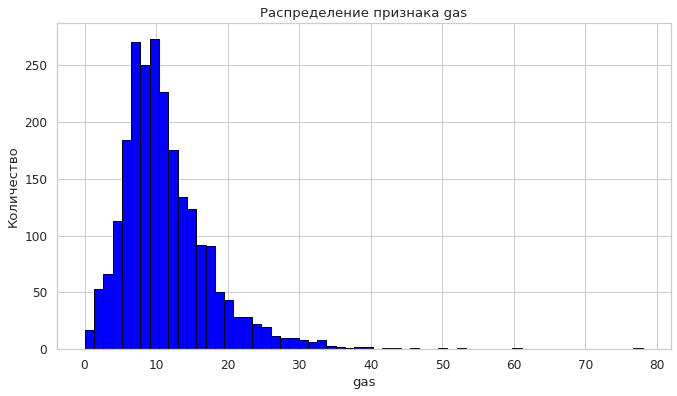

count    2329.000000
mean       11.375600
std         6.392041
min         0.008399
25%         7.282948
50%        10.100950
75%        14.216688
max        77.995040
Name: gas, dtype: float64


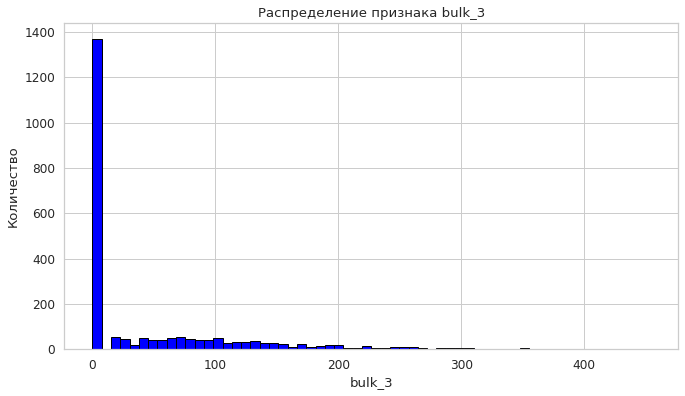

count    2329.000000
mean       47.348218
std        75.310430
min         0.000000
25%         0.000000
50%         0.000000
75%        80.000000
max       454.000000
Name: bulk_3, dtype: float64


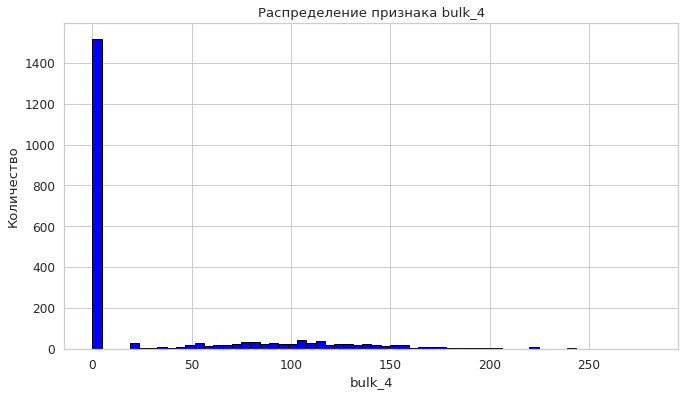

count    2329.000000
mean       37.303564
std        58.643238
min         0.000000
25%         0.000000
50%         0.000000
75%        77.000000
max       281.000000
Name: bulk_4, dtype: float64


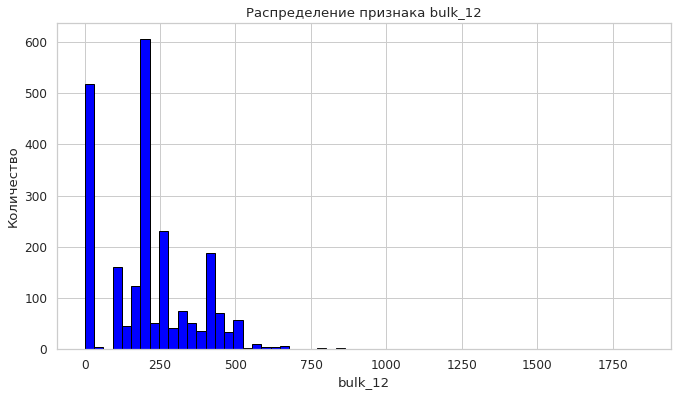

count    2329.000000
mean      208.415629
std       157.062272
min         0.000000
25%       105.000000
50%       206.000000
75%       282.000000
max      1849.000000
Name: bulk_12, dtype: float64


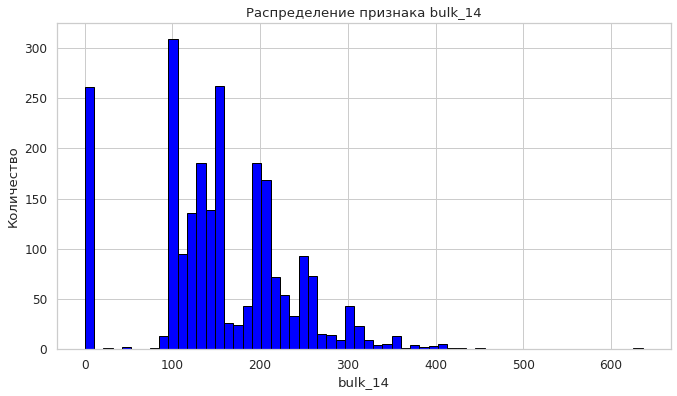

count    2329.000000
mean      153.853585
std        81.404354
min         0.000000
25%       105.000000
50%       149.000000
75%       204.000000
max       636.000000
Name: bulk_14, dtype: float64


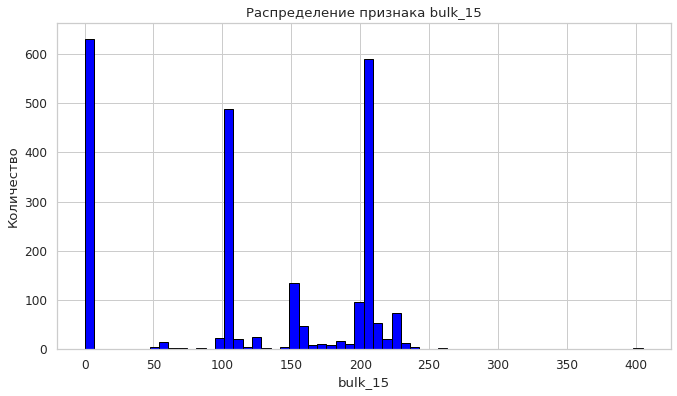

count    2329.000000
mean      119.952769
std        84.640443
min         0.000000
25%         0.000000
50%       107.000000
75%       204.000000
max       405.000000
Name: bulk_15, dtype: float64


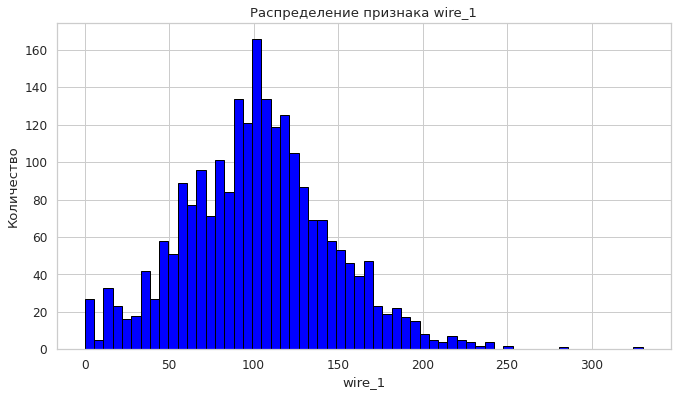

count    2329.000000
mean      102.443601
std        43.539993
min         0.000000
25%        73.207679
50%       101.119201
75%       128.091599
max       330.314424
Name: wire_1, dtype: float64


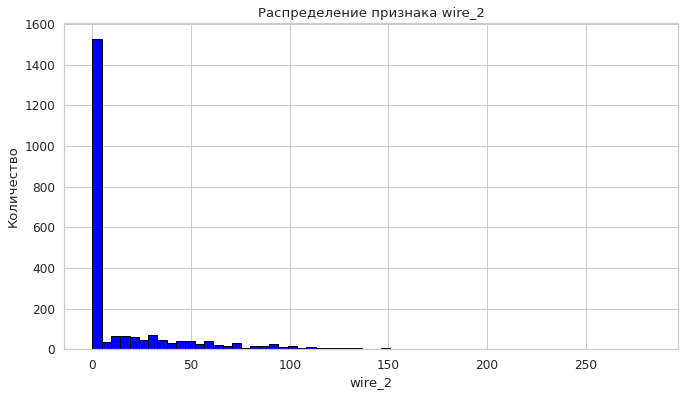

count    2329.000000
mean       17.609859
std        33.624771
min         0.000000
25%         0.000000
50%         0.000000
75%        23.102560
max       282.780152
Name: wire_2, dtype: float64


In [59]:
for i in range(len(num_col)):
    sns.set_style('whitegrid')
    plt.figure(figsize=(11, 6))
    plt.hist(data[num_col[i]], color = 'blue', edgecolor = 'black', bins = 60)
    plt.title(f"Распределение признака {num_col[i]}")
    plt.ylabel("Количество")
    plt.xlabel(num_col[i])
    plt.show()
    print(data[num_col[i]].describe())

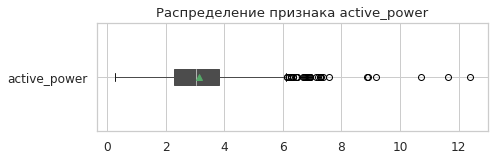

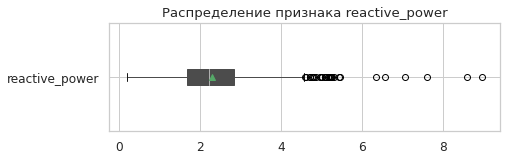

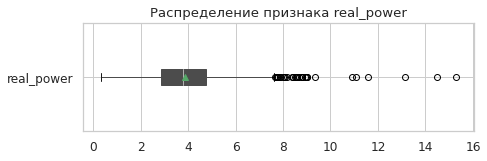

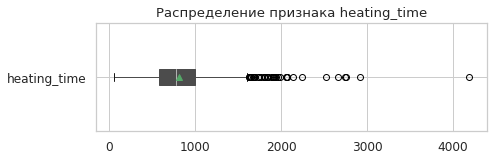

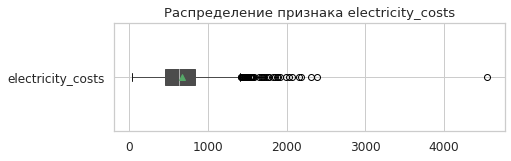

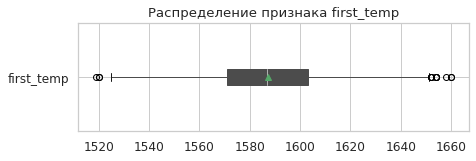

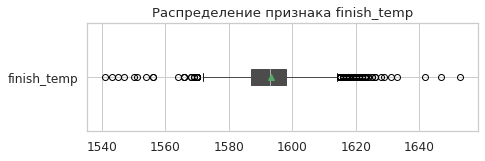

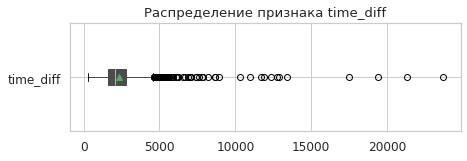

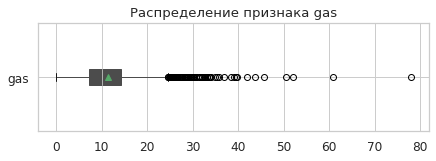

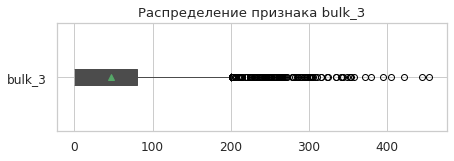

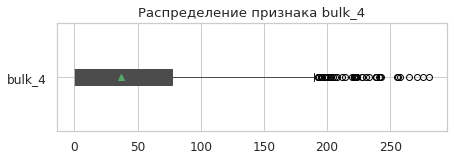

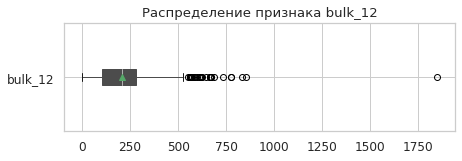

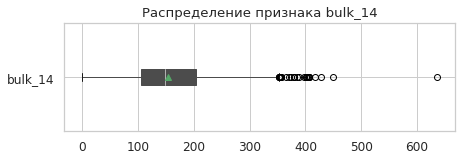

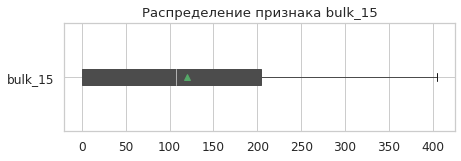

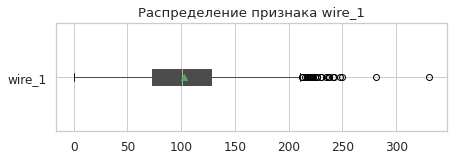

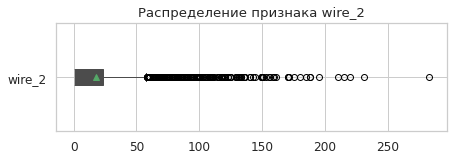

In [60]:
for i in range(len(num_col)):
    plt.figure(figsize=(7, 2))
    data.boxplot(num_col[i], patch_artist=True, vert=False, showmeans=True )
    plt.title(f"Распределение признака {num_col[i]}")
   
    plt.show()

После обработки датасета мы построили гистограммы и боксплоты для всех признаков. В большинстве случаев мы  наблюдаем нормальное распределение признаков, кроме признаков bulk_3, bulk_4, bulk_15, wire_2.

У каждого из признаков есть выбросы, которые пока оставим


Построим тепловую карту.

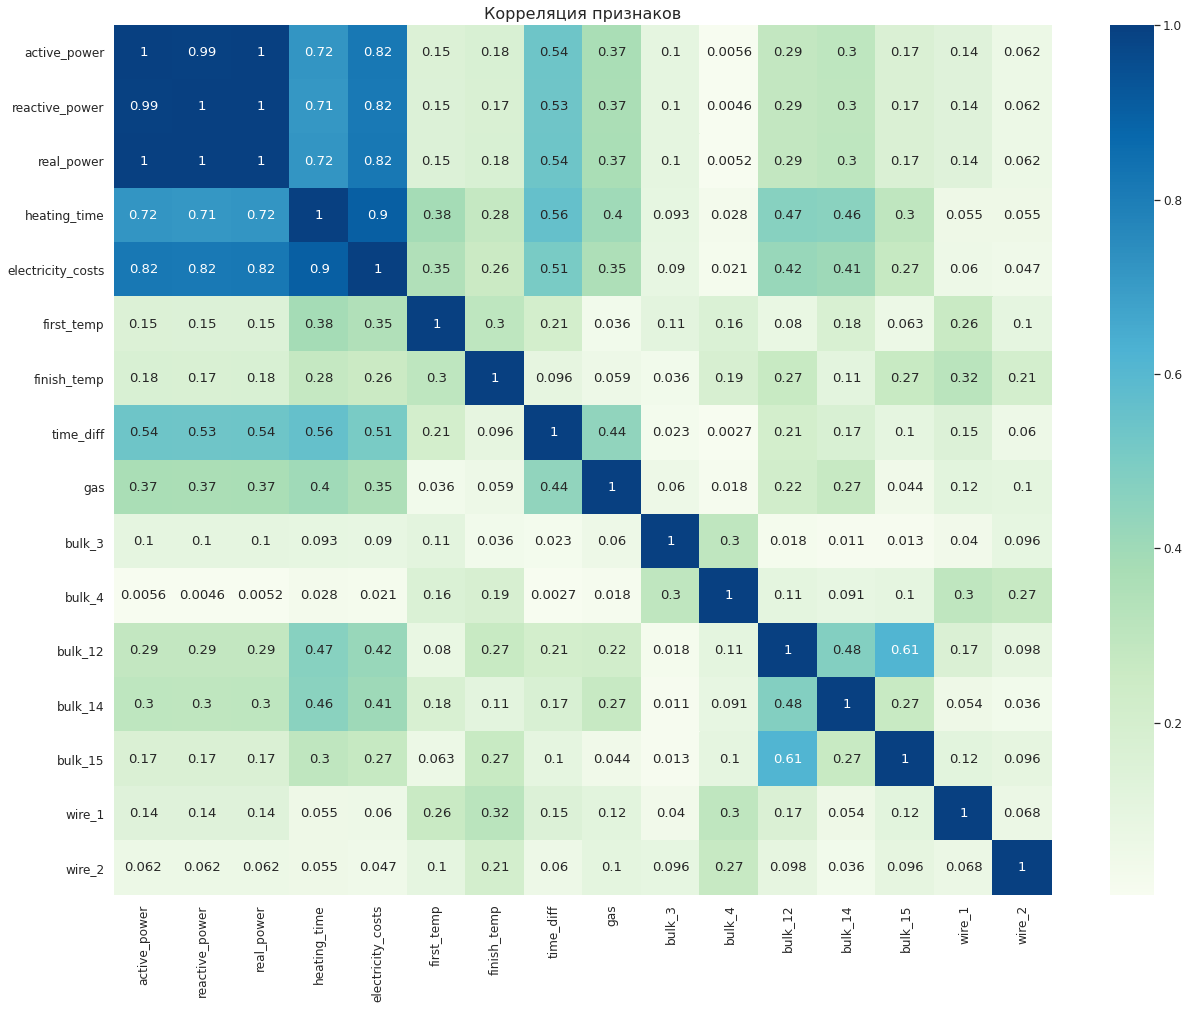

In [61]:
plt.figure(figsize=(21, 16))
fig = sns.heatmap(data.corr().abs(), cmap='GnBu', annot=True)
plt.title('Корреляция признаков', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()

Мы видим что высокая корреляция признаков  наблюдается между:
'active_power', 'reactive_power', 'real_power' и 'heating_time'

##  Подготовка данных <a name="preprocessing"></a>

In [62]:
RANDOM_STATE = 50824
TEST_SIZE = 0.25

In [63]:
X = data.drop('finish_temp', axis=1)
y = data['finish_temp']


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

In [64]:
print('Размер X_train: ', X_train.shape)
print('Размер X_test: ', X_test.shape)
print('Размер y_train: ', y_train.shape)
print('Размер y_test: ', y_test.shape)

Размер X_train:  (1746, 15)
Размер X_test:  (583, 15)
Размер y_train:  (1746,)
Размер y_test:  (583,)


Подготовили данные, разделили выборки:
- Размер X_train:  (1746, 15)
- Размер X_test:  (583, 15)
- Размер y_train:  (1746,)
- Размер y_test:  (583,)

##  Обучение моделей машинного обучения <a name="learning"></a>

Обучим модели, МАЕ на тесте должно быть <= 6.8

### RandomForestRegressor

In [65]:
%%time

model = RandomForestRegressor()
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'bootstrap': [True, False],
    'random_state': [RANDOM_STATE]
}
rf_grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)
result_rf = abs(rf_grid.best_score_)
print(f'MAE на тренировочной: {result_rf:.2f}')

MAE на тренировочной: 6.15
CPU times: user 2min 25s, sys: 367 ms, total: 2min 25s
Wall time: 2min 26s


### CatBoostRegressor

In [67]:
%%time

model = CatBoostRegressor(verbose=False)
params = {
    'loss_function':['MAE'],
    'depth': [5], 
    'learning_rate': [0.1], 
    'n_estimators': [500],  
    'random_state': [RANDOM_STATE],
}
cb_grid = GridSearchCV(model, params, cv=5,verbose=2, scoring='neg_mean_absolute_error')
cb_grid.fit(X_train, y_train)
result_cb = abs(cb_grid.best_score_)
print(f'MAE на тренировочной: {result_cb:.2f}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END depth=5, learning_rate=0.1, loss_function=MAE, n_estimators=500, random_state=50824; total time=   2.1s
[CV] END depth=5, learning_rate=0.1, loss_function=MAE, n_estimators=500, random_state=50824; total time=   1.9s
[CV] END depth=5, learning_rate=0.1, loss_function=MAE, n_estimators=500, random_state=50824; total time=   1.8s
[CV] END depth=5, learning_rate=0.1, loss_function=MAE, n_estimators=500, random_state=50824; total time=   1.9s
[CV] END depth=5, learning_rate=0.1, loss_function=MAE, n_estimators=500, random_state=50824; total time=   1.8s
MAE на тренировочной: 6.03
CPU times: user 7.24 s, sys: 204 ms, total: 7.44 s
Wall time: 11.5 s


In [ ]:
#%%time

#params = {
   # 'loss_function':['MAE'],
   # 'depth': [5], 
   # 'learning_rate': [0.1], 
   # 'n_estimators': [500],  
   # 'random_state': [RANDOM_STATE],}
#cb_grid = GridSearchCV(model, params, cv=5, est verbose=2)
#cb_grid.fit(X_train, y_train)
#train_predictions = cb_grid.predict(X_train)
#result_cb = mean_absolute_error(y_train, train_predictions)
#print(f'MAE на тренировочной: {result_cb:.2f}')

In [68]:
print('Лучшие параметры: ', cb_grid.best_params_)

Лучшие параметры:  {'depth': 5, 'learning_rate': 0.1, 'loss_function': 'MAE', 'n_estimators': 500, 'random_state': 50824}


### LGBMRegressor

In [69]:
%%time

model = LGBMRegressor()
params = {
    'metric': ['mae'],
    'max_depth': [10], 
    'num_leaves': [10],  
    'learning_rate': [0.05],  
    'random_state': [RANDOM_STATE],
}
lgbm_grid = GridSearchCV(model, params, cv=5, verbose=2, scoring='neg_mean_absolute_error')
lgbm_grid.fit(X_train, y_train)
result_lgbm = abs(lgbm_grid.best_score_)
print(f'MAE на тренировочной: {result_lgbm:.2f}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.05, max_depth=10, metric=mae, num_leaves=10, random_state=50824; total time= 2.0min
[CV] END learning_rate=0.05, max_depth=10, metric=mae, num_leaves=10, random_state=50824; total time= 1.8min
[CV] END learning_rate=0.05, max_depth=10, metric=mae, num_leaves=10, random_state=50824; total time=  46.4s
[CV] END learning_rate=0.05, max_depth=10, metric=mae, num_leaves=10, random_state=50824; total time=  36.3s
[CV] END learning_rate=0.05, max_depth=10, metric=mae, num_leaves=10, random_state=50824; total time=  26.5s
MAE на тренировочной: 6.11
CPU times: user 6min 22s, sys: 3.62 s, total: 6min 26s
Wall time: 6min 31s


In [ ]:
#%%time

#model = LGBMRegressor()
#params = {
    #'metric': ['mae'],
    #'max_depth': [10], 
    #'num_leaves': [10],  
    #'learning_rate': [0.05],  
    #'random_state': [RANDOM_STATE],}
#lgbm_grid = GridSearchCV(model, params, cv=5, verbose=2)
#lgbm_grid.fit(X_train, y_train)
#train_predictions = lgbm_grid.predict(X_train)
#result_lgbm = mean_absolute_error(y_train, train_predictions)
#print(f'MAE на тренировочной: {result_lgbm:.2f}')

In [70]:
print('Лучшие параметры: ', lgbm_grid.best_params_)

Лучшие параметры:  {'learning_rate': 0.05, 'max_depth': 10, 'metric': 'mae', 'num_leaves': 10, 'random_state': 50824}


**Выводы**

Мы провели обучение моделей  RandomForestRegressor, CatBoostRegressor, LGBMRegressor, использую следующие соотношения разбивки на выборки: 75 к 25. Также с заданным параметром RANDOM_STATE = 50824 и получили следующие результаты.
1. Размер выборок:
- Размер X_train: (1746, 15)
- Размер X_test: (583, 15)
- Размер y_train: (1746,)
- Размер y_test: (583,)
2. На тренировочной выборке модели дали следующие результаты:
-  RandomForestRegressor: MAE на тренировочной: 6.15
- CatBoostRegressor: MAE на тренировочной: 6.03, где лучшие параметры: {'depth': 5, 'learning_rate': 0.1, 'loss_function': 'MAE', 'n_estimators': 500, 'random_state': 50824}
- LGBMRegressor: MAE на тренировочной: 6/11, где лучшие параметры:  {'learning_rate': 0.05, 'max_depth': 10, 'metric': 'mae', 'num_leaves': 10, 'random_state': 50824}.

##  Выбор лучшей модели <a name="choosing"></a>

In [71]:
data = {'MAE на тренировочной':[result_rf, result_cb, result_lgbm]}
index = ['RandomForestRegressor', 'CatBoostRegressor', 'LGBMRegressor']
data_final = pd.DataFrame(data=data, index=index)
pd.set_option('precision', 2)
display(data_final.sort_values(by='MAE на тренировочной', ascending=True).style.background_gradient(cmap='Blues', axis=0))

,MAE на тренировочной
CatBoostRegressor,6.03
LGBMRegressor,6.11
RandomForestRegressor,6.15


Лучшая модель на тренировочной выборке CatBoostRegressor, проверим на тестовой:

In [72]:
%%time
model = CatBoostRegressor(
    depth=5,
    learning_rate=0.1,
    loss_function='MAE',
    n_estimators=500,
    random_state=RANDOM_STATE,
    verbose = False
)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
result_cb_t = mean_absolute_error(y_test, predictions)
print(f'MAE на тестовой: {result_cb_t:.2f}')

MAE на тестовой: 6.22
CPU times: user 1.24 s, sys: 48.4 ms, total: 1.29 s
Wall time: 2.1 s


Модель CatBoostRegressor показала MAE на тестовой: 6.22 что меньше поставленного условия где MAE  на тестовой должно быть <= 6.8

**Расчет метрики r2 на тестовой выборке**

In [73]:
r2 = r2_score(y_test, predictions)

print(f'r2 на тестовой выборке: {r2:.2f}')

r2 на тестовой выборке: 0.46


Видим, что r2 на тестовой выборке: 0.46 в среднем диапазоне, что говорит о среднем качестве модели. 

**Важность признаков у лучшей модели**

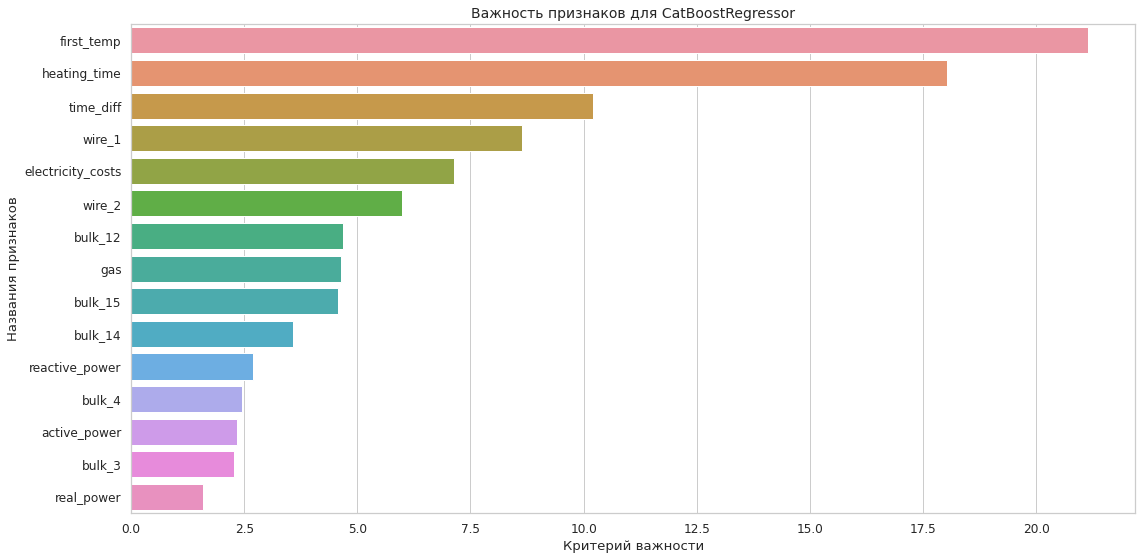

In [74]:
feature_importance_data = {
    'features': X_test.columns,
    'feature_importances': model.feature_importances_,
}
feature_importance_data = pd.DataFrame(feature_importance_data)
feature_importance_data.sort_values(by='feature_importances', ascending=False, inplace=True)
plt.figure(figsize=(18, 9))
sns.barplot(x=feature_importance_data['feature_importances'], y=feature_importance_data['features'])
plt.title('Важность признаков для CatBoostRegressor', fontsize=14)
plt.xlabel('Критерий важности')
plt.ylabel('Названия признаков')
plt.show()

Для модели наиболее важными признаками являются:
- температура  нагрева
- время нагрева

**Проверка моделей на адекватность**

In [75]:
dummy_mean = DummyRegressor('median')
dummy_mean.fit(X_train, y_train)
dummy_prediction = dummy_mean.predict(X_train)
mae_score = mean_absolute_error(y_train, dummy_prediction)

print(f'MAE констатной модели на тестовой выборке: {mae_score:.2f}')

MAE констатной модели на тестовой выборке: 7.95


CatBoostRegressor  показывает лучшие результаты чем на константной модели

**Вывод**

Мы провели обучение моделей  RandomForestRegressor, CatBoostRegressor, LGBMRegressor, использую следующие соотношения разбивки на выборки: 75 к 25. Также с заданным параметром RANDOM_STATE = 50824 и получили следующие результаты.
1. Размер выборок:
- Размер X_train: (1746, 15)
- Размер X_test: (583, 15)
- Размер y_train: (1746,)
- Размер y_test: (583,)
2. На тренировочной выборке модели дали следующие результаты:
-  RandomForestRegressor: MAE на тренировочной: 6.15
- CatBoostRegressor: MAE на тренировочной: 6.03, где лучшие параметры: {'depth': 5, 'learning_rate': 0.1, 'loss_function': 'MAE', 'n_estimators': 500, 'random_state': 50824}
- LGBMRegressor: MAE на тренировочной: 6/11, где лучшие параметры:  {'learning_rate': 0.05, 'max_depth': 10, 'metric': 'mae', 'num_leaves': 10, 'random_state': 50824}.
3. Лучшая модель на тренировочной выборке CatBoostRegressor. Модель CatBoostRegressor показала MAE на тестовой: 6.22 что меньше поставленного условия где MAE на тестовой должно быть <= 6.8
4. Видим, что r2 на тестовой выборке: 0.46 в среднем диапазоне, что соответственно говорит о среднем качестве модели.
5. Выявили важность признаков. Для модели наиболее важными признаками являются:
- температура  нагрева
- время нагрева
- затраты энергии.
6.  MAE констатной модели на тестовой выборке: 7.95. CatBoostRegressor  показывает лучшие результаты чем на константной модели


##  ОБЩИЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ <a name="resumefinal"></a>

**Цель проекта** - оптимизация производственных расходов металлургического комбината, с помощью построения модели машинного обучения, которая предсказывает температуру сплава.

- Целевая переменная target - последняя температура по всей партии 
- Целевая метрика - MAE (нужно получить не более 6.8 на тесте)

Данные состоят из нескольких файлов, полученных из разных источников: 

- data_arc_new.csv — данные об электродах;

- data_bulk_new.csv — данные о подаче сыпучих материалов (объём);

- data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);

- data_gas_new.csv — данные о продувке сплава газом;

- data_temp_new.csv — результаты измерения температуры;

- data_wire_new.csv — данные о проволочных материалах (объём);

- data_wire_time_new.csv — данные о проволочных материалах (время).

Которые в процессе работы были обработаны и подготовлены для построения модели.

**Файл data_arc_new.csv — данные об электродах**
1. Переименованы столбцы по правилам PEP8
2. Удалены данные партий с отрицательной реактивной мощностью
3. Произведен расчет полной мощности, расчет времени нагрева в секундах, а также затраты энергии, данные добавлены в новые столбцы

**Файл data_bulk_new.csv - данные о подаче сыпучих материалов (объём)**
1. Переименованы столбцы по правилам PEP8
2. По рекомендациям заказчика удаленны признаки, в которых более 80% пропущенных значений, оставшиеся заменены нулями. 

**Файл data_gas_new.csv — данные о продувке сплава газом**
1. Переименованы столбцы по правилам PEP8.

**Файл data_temp_new.csv — результаты измерения температуры**
1. Переименованы столбцы по правилам PEP8
2. Удалены партии с температурой менее 1500 а также партии где один замер температуры и партии с пропущенными значениями:
3. Выполнено определение начальной и конечной температур замеров:

**Файл data_wire_new.csv — данные о проволочных материалах (объём)**
1. Переименованы столбцы по правилам PEP8
2. Удаленны признаки, в которых изначально имеется более 80% пропущенных значений, также заполним оставшиеся пропущенные значения нулями. 


**Для объединения таблиц** используем все, кроме data_bulk_time_new и data_wire_time_new.
Объединили все необходимые датасеты в один итоговый. В нем пропуски и дубликаты отсутствуют, также удалили признак key. Итоговый размер датасета (2329, 19).

**После обработки датасета** мы построили гистограммы и боксплоты для всех признаков. В большинстве случаев мы наблюдаем нормальное распределение признаков, кроме признаков bulk_3, bulk_4, bulk_15, wire_2.У каждого из признаков есть выбросы, которые пока оставим

Построив тепловую карту  видим, что высокая корреляция признаков наблюдается между: 'active_power', 'reactive_power', 'real_power' и 'heating_time' 

**Мы провели обучение моделей**  RandomForestRegressor, CatBoostRegressor, LGBMRegressor, использую следующие соотношения разбивки на выборки: 75 к 25. Также с заданным параметром RANDOM_STATE = 50824 и получили следующие результаты.
1. Размер выборок:
- Размер X_train: (1746, 15)
- Размер X_test: (583, 15)
- Размер y_train: (1746,)
- Размер y_test: (583,)
2. На тренировочной выборке модели дали следующие результаты:
-  RandomForestRegressor: MAE на тренировочной: 6.15
- CatBoostRegressor: MAE на тренировочной: 3.35, где лучшие параметры:  {'depth': 5, 'learning_rate': 0.1, 'loss_function': 'MAE', 'n_estimators': 500, 'random_state': 50824}
- LGBMRegressor: MAE на тренировочной: 5.01, где лучшие параметры:  {'learning_rate': 0.05, 'max_depth': 10, 'metric': 'mae', 'num_leaves': 10, 'random_state': 50824}.
3. Лучшая модель на тренировочной выборке CatBoostRegressor. Модель CatBoostRegressor показала MAE на тестовой: 6.22 что меньше поставленного условия где MAE на тестовой должно быть <= 6.8
4. Видим, что r2 на тестовой выборке: 0.46 в среднем диапазоне, что соответственно говорит о среднем качестве модели.
5. Выявили важность признаков. Для модели наиболее важными признаками являются:
- температура  нагрева
- время нагрева
- затраты энергии.
6.  MAE констатной модели на тестовой выборке: 7.95. CatBoostRegressor  показывает лучшие результаты чем на константной модели

**Рекомендации**

- Уделить внимание точности и своевременности замерам температуры
- Исключить или технологически обосновать наличие значимого количества выбросов, что вероятно даст возможность построению более точной модели(если убрать выбросы) с более высоким показателем r2.